In [1]:
import pandas as pd
import numpy as np
import os
import scipy
import itertools

import matplotlib.pyplot as plt    
import xgboost as xgb
iv=['np'	, 'os'	 ,'pd'	, 'plt'	 ,'tqdm'	, 'train'	 ,'train_date'	, 'train_date_num'	, 'train_num'	 ]
def memchk(iv):
    import sys,operator
    ipython_vars=iv
    ,'warnings'	, 'xgboost']
    print sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)
    return sorted([{i:sys.getsizeof(globals().get(i))/1000000.0} for i in ipython_vars])
%matplotlib inline
from sklearn.metrics import confusion_matrix
import warnings
%load_ext autotime
warnings.filterwarnings('ignore')
from tqdm import tqdm
#plt.style.use('classic')

C:\Users\sushant\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


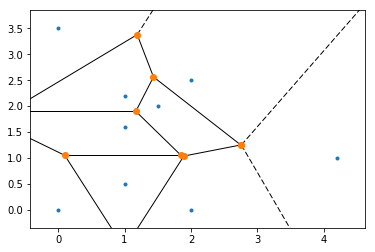

time: 693 ms


In [2]:
 points = np.array([[0, 0], [0, 3.5], [1.5, 2], [1, 0.5], [1, 1.6], [1, 2.2],
                   [2, 0], [4.2, 1], [2, 2.5]])
from scipy.spatial import Voronoi, voronoi_plot_2d


vor = Voronoi(points)



voronoi_plot_2d(vor)
plt.show()

In [352]:
data =pd.read_csv('Iris.csv')
data['Species']=data['Species'].apply(lambda l :l.split('-')[1])

time: 28 ms


In [353]:
data=data.rename(columns={'SepalLengthCm':'seplen',
     'SepalWidthCm':'sepwid',
     'PetalLengthCm':'petlen',
     'PetalWidthCm':'petwid'})

time: 3 ms


In [354]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
species_num= (le.fit_transform(data['Species'])+1)#*5

time: 3 ms


In [355]:
data.head()

,Id,seplen,sepwid,petlen,petwid,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


time: 14 ms


In [356]:
feat=['seplen','sepwid','petlen','petwid']

time: 1 ms


In [357]:
data[feat].describe()

,seplen,sepwid,petlen,petwid
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


time: 24 ms


In [358]:
from sklearn.cluster import KMeans
#from matplotlib.cm import cool

time: 2 ms


In [377]:
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10,verbose=1)
#kmeans1 = KMeans(init='k-means++', n_clusters=3, n_init=10,verbose=1)

time: 2 ms


In [378]:
kmeans.fit(data[['seplen','petwid']])

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 28.7892238878
start iteration
done sorting
end inner loop
Iteration 1, inertia 25.9394613985
start iteration
done sorting
end inner loop
Iteration 2, inertia 25.1340328502
start iteration
done sorting
end inner loop
Iteration 3, inertia 24.8901268446
start iteration
done sorting
end inner loop
Iteration 4, inertia 24.7113150764
start iteration
done sorting
end inner loop
Iteration 5, inertia 24.7113150764
center shift 0.000000e+00 within tolerance 6.298269e-05
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 29.3509213108
start iteration
done sorting
end inner loop
Iteration 1, inertia 26.8670946183
start iteration
done sorting
end inner loop
Iteration 2, inertia 25.6261930736
start iteration
done sorting
end inner loop
Iteration 3, inertia 25.4549805861
start iteration
done sorting
end inner loop
Iteration 4, inertia 25.3855433566
start iteration
done sortin

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=1)

time: 872 ms


In [379]:
kmeans.cluster_centers_

array([[ 6.24705882,  1.72745098],
       [ 5.006     ,  0.244     ],
       [ 7.16086957,  2.0826087 ],
       [ 5.49615385,  1.21538462]])

time: 6 ms


In [380]:

coldict={'versicolor':'r','setosa':'g','virginica':'b'}

time: 33 ms


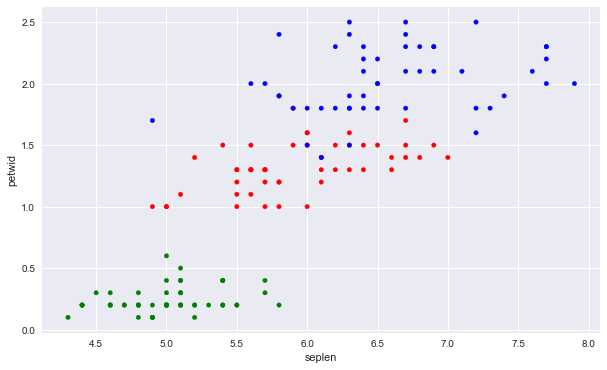

time: 268 ms


In [381]:
data.plot(x='seplen',y='petwid',kind='scatter',figsize=(10,6),c=data['Species'].apply(lambda l: coldict[l]))

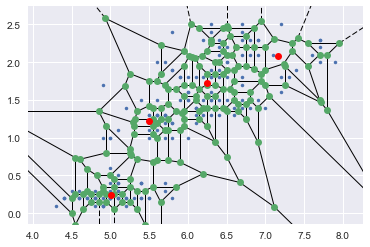

time: 203 ms


In [382]:
vor = Voronoi(np.array(data[['seplen','petwid']]))
#plt.plot(data['seplen'],data['petwid'],'.')
voronoi_plot_2d(vor)
plt.plot(kmeans.cluster_centers_.transpose()[0],kmeans.cluster_centers_.transpose()[1],'o',c='r')
plt.show()

In [383]:
pred = kmeans.predict(data[['seplen','petwid']])
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 0, 2, 3, 0, 3, 0, 3, 0, 3, 3, 0, 3, 0, 3, 0, 3, 3, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 0, 0, 3, 3, 3, 0,
       3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 2, 0, 0, 2, 3, 2, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0])

time: 6 ms


In [397]:
coldict2={0:'g',1:'r',2:'b',3:'y',4:'m',5:'c',6:'g',7:'r',8:'b',9:'y'}

time: 2 ms


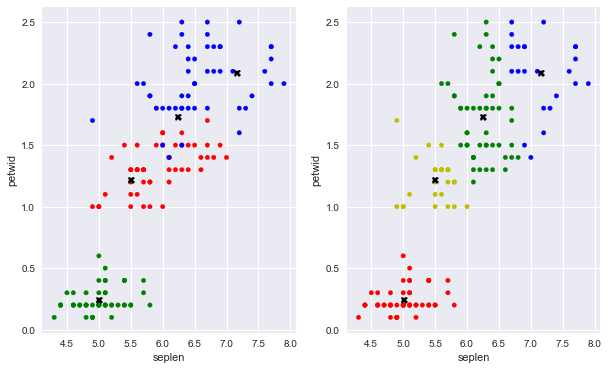

time: 484 ms


In [392]:

plt.rc('font', size=13)
fig = plt.figure(figsize=(18, 8))
ax1 = plt.subplot2grid((1,2), (0,0))
data.plot(x='seplen',y='petwid',kind='scatter',figsize=(10,6),c=data['Species'].apply(lambda l: coldict[l]),ax=ax1)
plt.plot(kmeans.cluster_centers_.transpose()[0],kmeans.cluster_centers_.transpose()[1],'X',c='black')
ax2 = plt.subplot2grid((1,2), (0,1))
data.plot(x='seplen',y='petwid',kind='scatter',figsize=(10,6),c=map((lambda l: coldict2[l]),pred),ax=ax2)
plt.plot(kmeans.cluster_centers_.transpose()[0],kmeans.cluster_centers_.transpose()[1],'X',c='black')

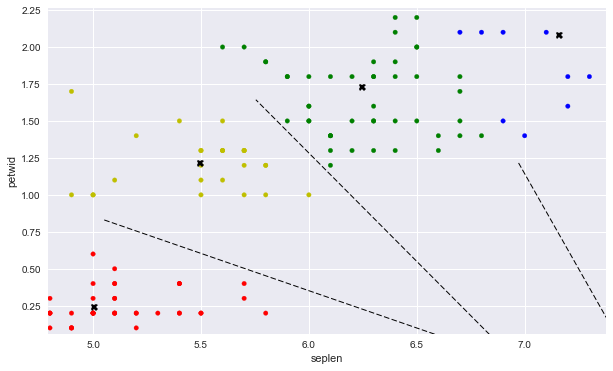

time: 258 ms


In [393]:
vor = Voronoi(kmeans.cluster_centers_)
fg=voronoi_plot_2d(vor)
data.plot(x='seplen',y='petwid',kind='scatter',figsize=(10,6),c=map((lambda l: coldict2[l]),pred),ax=fg.gca())
plt.plot(kmeans.cluster_centers_.transpose()[0],kmeans.cluster_centers_.transpose()[1],'X',c='black')

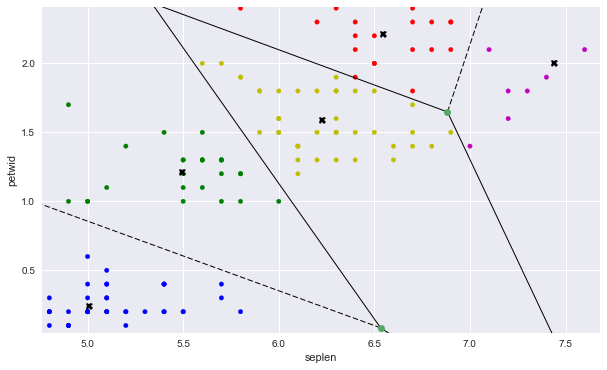

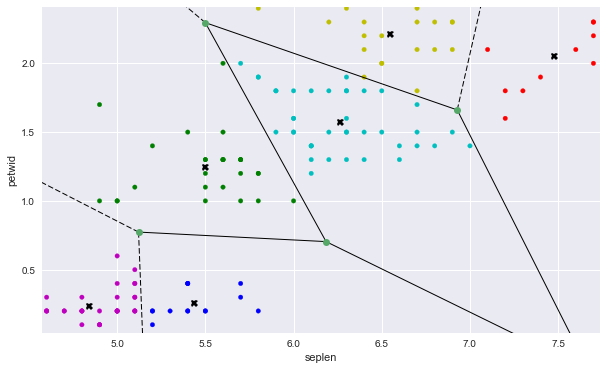

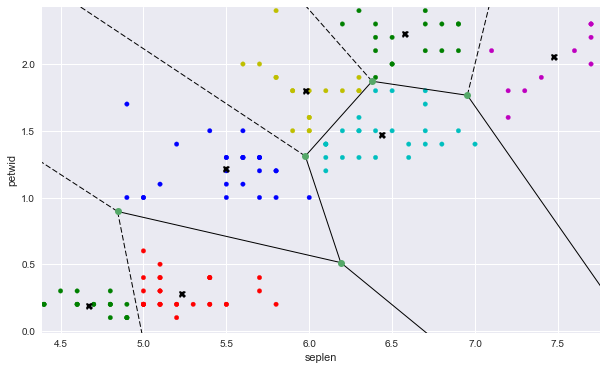

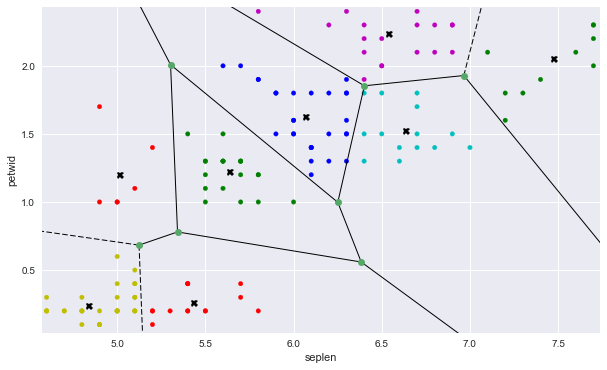

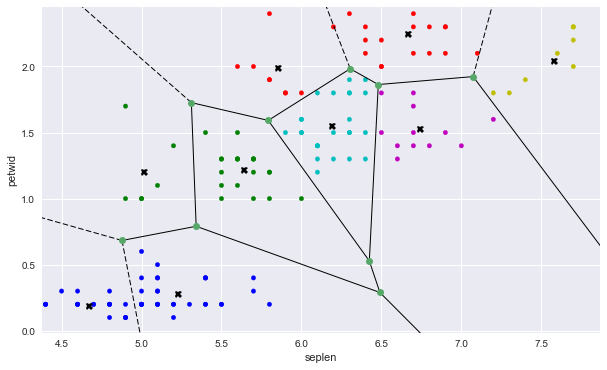

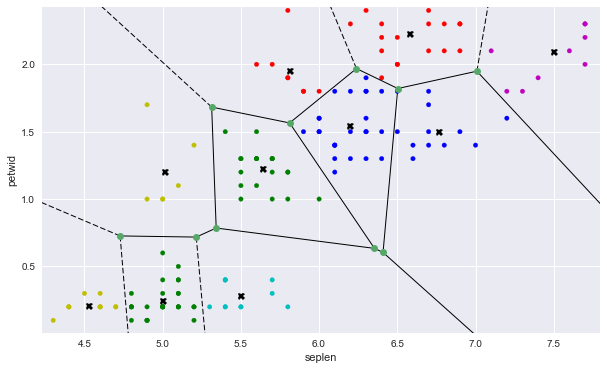

time: 1.64 s


In [399]:
for i in range(5,11):
    kmeans = KMeans(init='k-means++', n_clusters=i, n_init=10,verbose=0)
    kmeans.fit(data[['seplen','petwid']])
    pred = kmeans.predict(data[['seplen','petwid']])
    vor = Voronoi(kmeans.cluster_centers_)
    fg=voronoi_plot_2d(vor)
    data.plot(x='seplen',y='petwid',kind='scatter',figsize=(10,6),c=map((lambda l: coldict2[l]),pred),ax=fg.gca())
    plt.plot(kmeans.cluster_centers_.transpose()[0],kmeans.cluster_centers_.transpose()[1],'X',c='black')

In [426]:
from sklearn.cluster import DBSCAN
kmeans = DBSCAN()
#kmeans.fit(data[['seplen','petwid']])
pred = kmeans.fit_predict(data[feat])+1
data['pred']=pred
#data.plot(x='seplen',y='petwid',kind='scatter',figsize=(10,6),c=map((lambda l: coldict2[l]),pred))
#data.plot(x='sepwid',y='petwid',kind='scatter',figsize=(10,6),c=map((lambda l: coldict2[l]),pred))
#,ax=fg.gca())

#plt.plot(kmeans.cluster_centers_.transpose()[0],kmeans.cluster_centers_.transpose()[1],'X',c='black')
#plt.show()

time: 49 ms


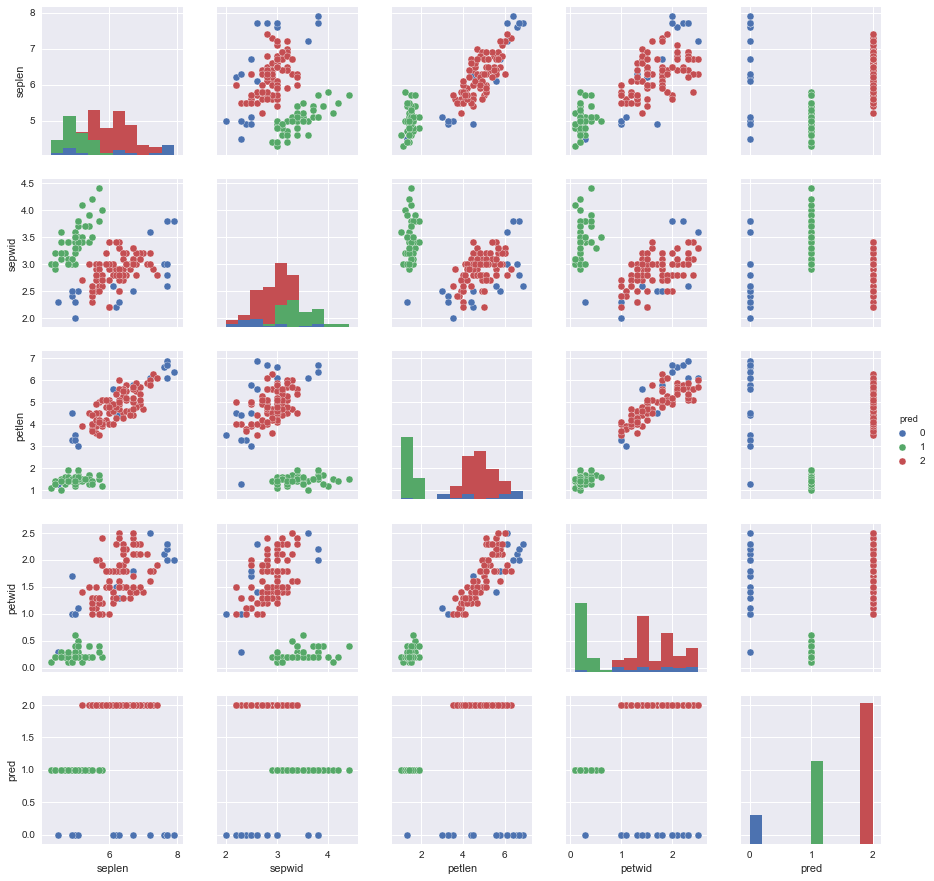

time: 5.36 s


In [429]:
sns.pairplot(data[feat+['pred']],hue='pred')

In [431]:
#vor = Voronoi(kmeans.labels_)
#fg=voronoi_plot_2d(vor)

time: 2 ms


time: 2 ms


In [325]:
#data['Species'].apply(lambda )

time: 1e+03 µs
